<div style="text-align: center; background-color: #f2f2f2; padding: 15px;">
  <h1 style="color: #880808; font-size: 35px;">Heart Diseases</h1>
</div>

![](https://images.hindustantimes.com/img/2022/08/24/1600x900/FaRXbp6XEAEwwpS_1661306749722_1661306764629_1661306764629.jpg)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


> - The dataset has no missing values
> - Some columns are of categorical type, so we must process the data later
> - **Let's analyze the data**

<div style="text-align: center; background-color: #f2f2f2; padding: 10px;">
  <h1 style="color: #006D77; font-size: 25px;">Data Visualization</h1>
</div>

In [6]:
# defining the colors of charts

colors = ['#B0B7B7', '#006D77']

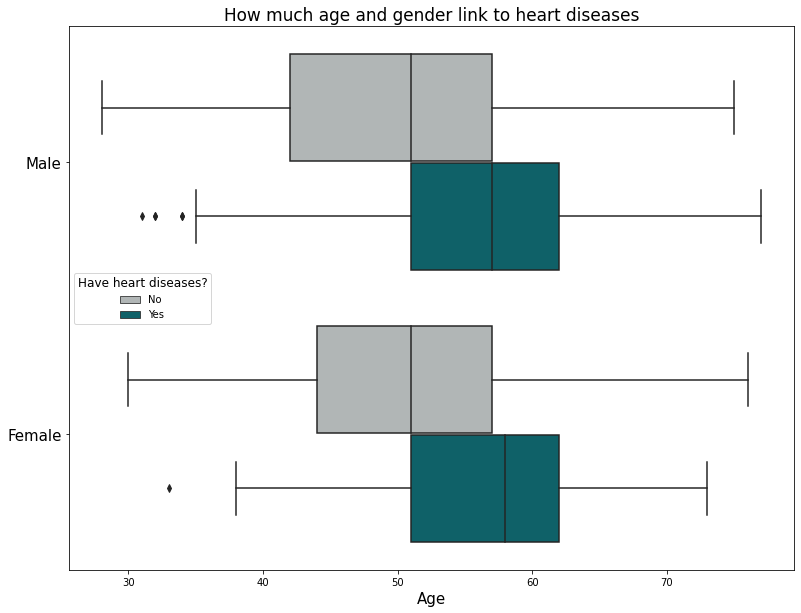

In [7]:
fig, ax = plt.subplots(figsize=(13, 10))

sns.boxplot(data=df, x='Age', y='Sex', hue='HeartDisease', ax=ax, palette=colors)

ax.set_title('How much age and gender link to heart diseases', fontsize=17)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('')
ax.set_yticklabels(['Male', 'Female'])
ax.tick_params(axis='y', labelsize=15)

legend = plt.legend(loc='center left')
legend.set_title('Have heart diseases?', prop={'size': 12})
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')


plt.show()

> - Generally, older people are more at risk of getting heart diseases
> - The gender doesn't matter much

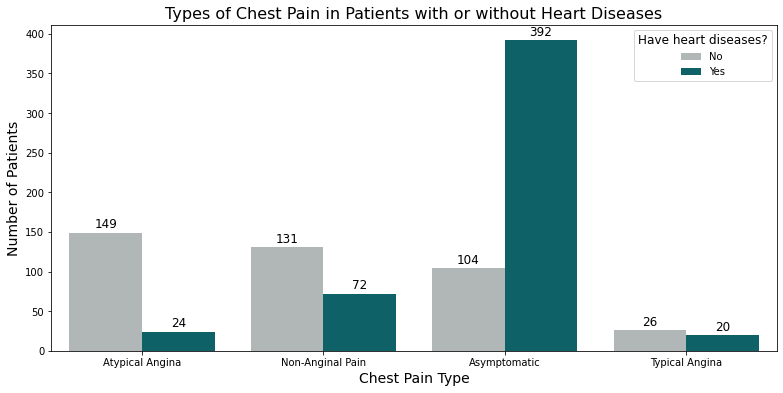

In [8]:
# ordering the values of each column to annotate the labels on chart

cpt = df.groupby(['ChestPainType', 'HeartDisease'])['HeartDisease'].count()
ordering_list = [2, 3, 4, 5, 0, 1, 5, 7]

cpt_ordering = cpt.values[ordering_list]

# making the plot

fig, ax = plt.subplots(figsize=(13, 6))

sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', ax=ax, palette=colors)

ax.set_title('Types of Chest Pain in Patients with or without Heart Diseases', fontsize=16)
ax.set_xlabel('Chest Pain Type', fontsize=14)
ax.set_ylabel('Number of Patients', fontsize=14)

ax.set_xticklabels(['Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic', 'Typical Angina'])

legend = plt.legend()
legend.set_title('Have heart diseases?', prop={'size': 12})
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')

for p in ax.patches:
    height = p.get_height()
    if not height:
        continue
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 5),
                textcoords="offset points", ha='center', fontsize=12)


plt.show()

> - Chest pain is not always an agravatting factor for heart diseases, the high value of people with heart disease and asymptomatic chest pain shows this

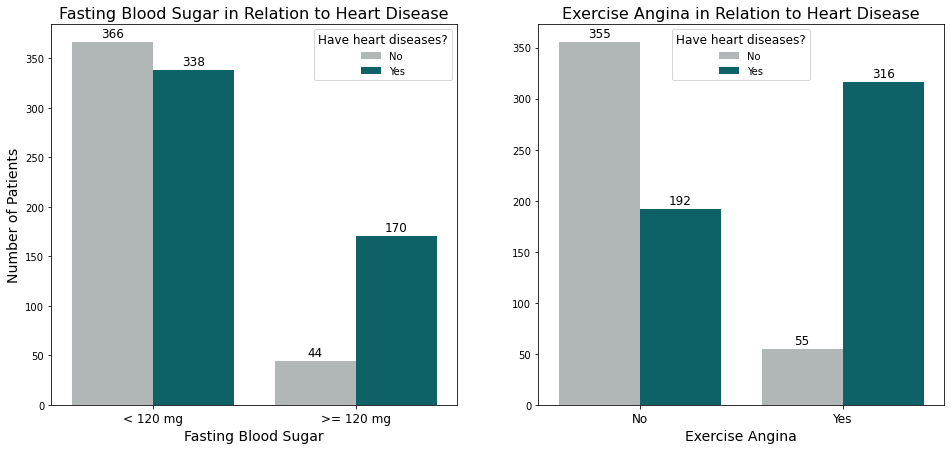

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 7))

sns.countplot(data=df, hue='HeartDisease', x='FastingBS', ax=ax[0], palette=colors)
sns.countplot(data=df, hue='HeartDisease', x='ExerciseAngina', ax=ax[1], palette=colors)

ax[0].set_title('Fasting Blood Sugar in Relation to Heart Disease', fontsize=(16))
ax[1].set_title('Exercise Angina in Relation to Heart Disease', fontsize=(16))

ax[0].set_xlabel('Fasting Blood Sugar', fontsize=14)
ax[1].set_xlabel('Exercise Angina', fontsize=14)

ax[0].set_ylabel('Number of Patients', fontsize=14)
ax[1].set_ylabel('')

ax[0].set_xticklabels(['< 120 mg', '>= 120 mg'])
ax[1].set_xticklabels(['No', 'Yes'])

ax[0].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)

legend = ax[0].legend()
legend.set_title('Have heart diseases?', prop={'size': 12})
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')

legend = ax[1].legend(loc='upper center')
legend.set_title('Have heart diseases?', prop={'size': 12})
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')

for p in ax[0].patches:
    height = p.get_height()
    if not height:
        continue
    ax[0].annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 5),
                textcoords="offset points", ha='center', fontsize=12)
    
for p in ax[1].patches:
    height = p.get_height()
    if not height:
        continue
    ax[1].annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 5),
                textcoords="offset points", ha='center', fontsize=12)

plt.show()

> - We can see that having 120mg or plus of fasting sugar on blood can trigger heart diseases, but having less doesn't prevent you from having these diseases, however there are less chance
> - Feeling angina (chest pain) during or after exercise can be an important factor to trigger heart diseases.

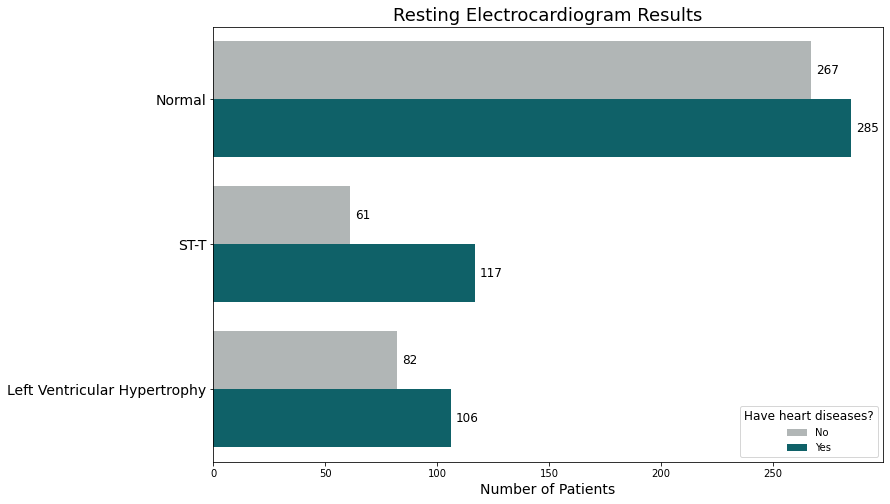

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.countplot(data=df, y='RestingECG', hue='HeartDisease', orient='h', ax=ax, palette=colors)

ax.set_title('Resting Electrocardiogram Results', fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Number of Patients', fontsize=14)
ax.set_yticklabels(['Normal', 'ST-T', 'Left Ventricular Hypertrophy'])
ax.tick_params(axis='y', labelsize=14)

for p in ax.patches:
    width = p.get_width()
    if not width:  # Ignorar barras vazias
        continue
    ax.annotate(str(int(width)), xy=(width, p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords="offset points", ha='left', va='center',
                fontsize=12)
    
legend = ax.legend()
legend.set_title('Have heart diseases?', prop={'size': 12})
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')

plt.show()

> - Patients with result of electrocardiogram equal to 'Normal' have a percentual bigger than others results to people without heart disease.

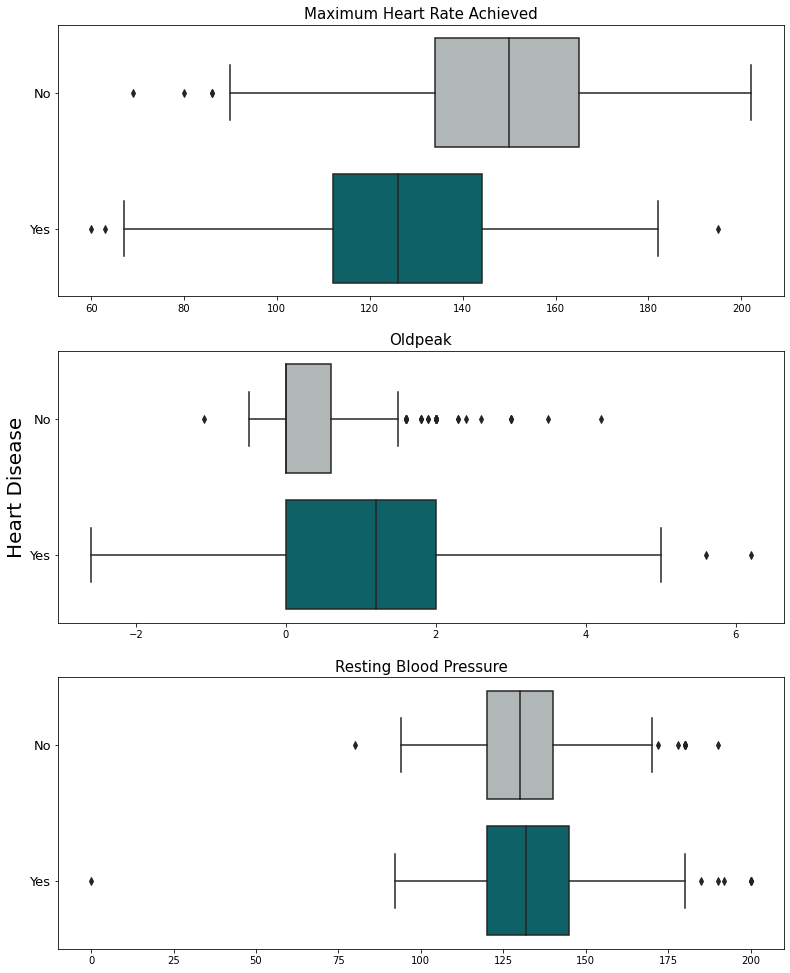

In [11]:
fig, ax = plt.subplots(nrows=3, figsize=(13, 17))

for i, val in enumerate(['MaxHR', 'Oldpeak', 'RestingBP']):
    sns.boxplot(data=df, orient='h', y='HeartDisease', x=val, ax=ax[i], palette=colors)
    ax[i].set_ylabel('')
    ax[i].set_yticklabels(['No', 'Yes'])
    ax[i].tick_params(axis='y', labelsize=13)
    
ax[1].set_ylabel('Heart Disease', fontsize=20)

ax[0].set_title('Maximum Heart Rate Achieved', fontsize=15)
ax[1].set_title('Oldpeak', fontsize=15)
ax[2].set_title('Resting Blood Pressure', fontsize=15)

ax[0].set_xlabel('', fontsize=15)
ax[1].set_xlabel('', fontsize=15)
ax[2].set_xlabel('', fontsize=15)
    
plt.show()

> - The maximum heart rate achieved greatly influences the chances of having heart disease, people with lower rate tend more than people with higher rate.
> - The old peak of depression of ST segment has a concentration between 0.0 to 0.75 more or less to people without heart diseases.
> - Resting blood pressure doesn't seem influences so much.

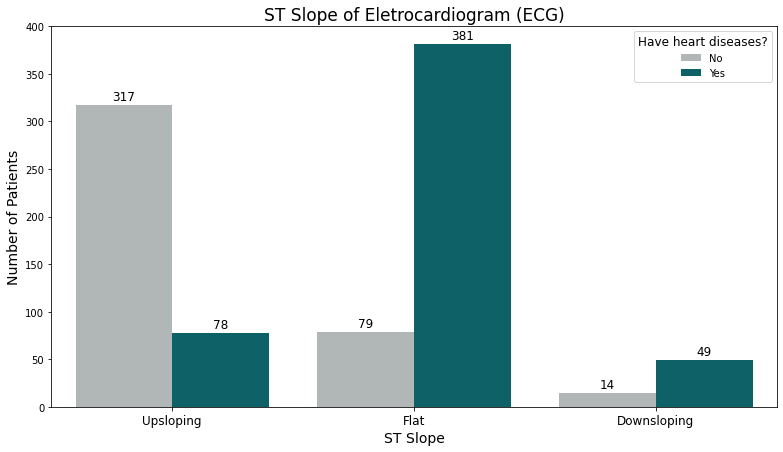

In [12]:
fig, ax = plt.subplots(figsize=(13, 7))

sns.countplot(data=df, x='ST_Slope', hue='HeartDisease', ax=ax, palette=colors)

for p in ax.patches:
    height = p.get_height()
    if not height:
        continue
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 5),
                textcoords="offset points", ha='center', fontsize=12)

ax.set_title('ST Slope of Eletrocardiogram (ECG)', fontsize=17)
    
ax.set_ylabel('Number of Patients', fontsize=14)
ax.set_xlabel('ST Slope', fontsize=14)

ax.set_xticklabels(['Upsloping', 'Flat', 'Downsloping'])
ax.tick_params(axis='x', labelsize=12)

legend = ax.legend()
legend.set_title('Have heart diseases?', prop={'size': 12})
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
    
plt.show()

> - The flat and down slope on the electrocardiogram has a significant influence on the probability of getting heart disease, as opposed to the Up slope

<div style="text-align: center; background-color: #f2f2f2; padding: 10px;">
  <h1 style="color: #006D77; font-size: 25px;">Data Preparation</h1>
</div>

> - Data Preparation for the Machine Learning models

In [13]:
# Using OneHotEncoder

onehot = OneHotEncoder(drop='if_binary', sparse_output=False, dtype=int)

df['Sex'] = onehot.fit_transform(df.Sex.values.reshape(-1, 1))
df['ExerciseAngina'] = onehot.fit_transform(df.ExerciseAngina.values.reshape(-1, 1))

In [14]:
# Splitting the other columns

df = pd.get_dummies(df)

In [15]:
# Data Standardization

scaler = StandardScaler()

for col in df.drop('HeartDisease', axis=1).columns:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

In [16]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.515952,0.410909,0.825070,-0.551341,1.382928,-0.823556,-0.832432,0,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-0.271448,-1.002181,1.150674
1,-0.478484,-1.938163,1.491752,-0.171961,-0.551341,0.754157,-0.823556,0.105664,1,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,-0.271448,0.997824,-0.869056
2,-1.751359,0.515952,-0.129513,0.770188,-0.551341,-1.525138,-0.823556,-0.832432,0,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,-1.228087,2.038947,-0.271448,-1.002181,1.150674
3,-0.584556,-1.938163,0.302825,0.139040,-0.551341,-1.132156,1.214246,0.574711,1,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-0.271448,0.997824,-0.869056
4,0.051881,0.515952,0.951331,-0.034755,-0.551341,-0.581981,-0.823556,-0.832432,0,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,-0.271448,-1.002181,1.150674


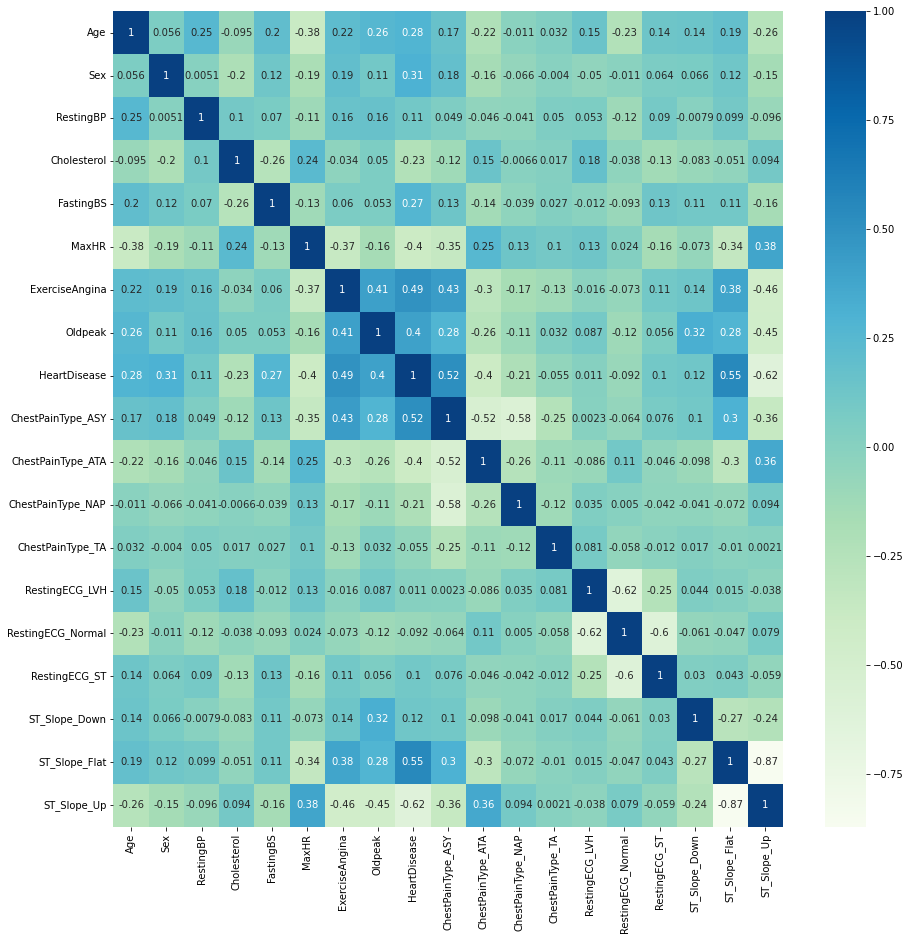

In [17]:
# Correlation between variables

fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(df.corr(), annot=True, cmap='GnBu')

plt.show()

<div style="text-align: center; background-color: #f2f2f2; padding: 10px;">
  <h1 style="color: #006D77; font-size: 25px;">Machine Learning</h1>
</div>

### Splitting data into training and testing data for classification models

In [18]:
X = df.drop('HeartDisease', axis=1)
y = df.HeartDisease

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12, stratify=y)
X_train.shape, X_test.shape

((734, 18), (184, 18))

### Cross Validation

In [20]:
# models

models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(n_estimators=50),
    'GradientBoosting': GradientBoostingClassifier()
}

In [21]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)

In [22]:
for name, model in models.items():
    cross_result = cross_val_score(model, X_train, y_train, cv=kf, scoring='recall')
    
    print(f'{model}\nMean: {cross_result.mean()}\nStd: {cross_result.std()}\n')

LogisticRegression()
Mean: 0.8894534635039383
Std: 0.04137912601280913

RandomForestClassifier(n_estimators=50)
Mean: 0.8860074592333461
Std: 0.025005569027300126

GradientBoostingClassifier()
Mean: 0.8714966170113596
Std: 0.029721269784311184



> - Taking into account the mean and standard deviation of the models, the best model was **Random Forest**

### GridSearchCV

In [23]:
params = {
    'n_estimators': [70, 80, 90],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

> - Choosing **recall** as scoring on GridSeachCV to improve the recall of our model.
> - By doing so, our model will favor correct predictions of **positive negatives** (people who actually have heart disease) while avoiding misinformation about people who may or may not have heart disease.

In [24]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=10, scoring='recall')
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 80}

In [25]:
best_model = grid_search.best_estimator_

In [26]:
# using the best model to predict the testing data

y_pred = best_model.predict(X_test)

Accuracy: 0.8804347826086957
Recall: 0.9117647058823529


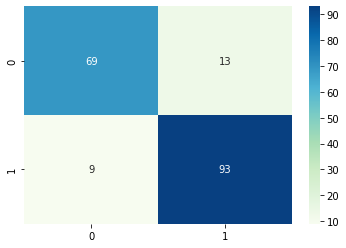

In [27]:
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred)}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=y_pred)}')

sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True, cmap='GnBu');

> - Our model had an **accuracy of 88%**.
> - Highlighting the high **recall of 91%**, this model was right for **93 out of 102** new patients with heart disease.